In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #charting
from scipy.stats import mode #statistics for slope
from sklearn.metrics import mean_squared_error #error metric to optimise when we build a model
from math import sqrt #Other math functions
import plotly.express as px #alternative charting function
import lightgbm as lgb #popular model choice
import seaborn as sns #alternative charting function
import gc

import os

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
df = pd.read_csv('Foreign_Exchange_Rates.csv',engine = 'python')

In [6]:
df.head(5)

Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0           0  2000-01-03                            1.5172   
1           1  2000-01-04                            1.5239   
2           2  2000-01-05                            1.5267   
3           3  2000-01-06                            1.5291   
4           4  2000-01-07                            1.5272   

  EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0               0.9847                              1.9033   
1                 0.97                              1.9238   
2               0.9676                              1.9339   
3               0.9686                              1.9436   
4               0.9714                               1.938   

  UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                    0.6146             1.805   
1                                    0.6109            1.8405   
2                                    0.6092             1.856   
3                                     0.607              1.84   
4                                    0.6104             1.831   

  CANADA - CANADIAN DOLLAR/US$ CHINA - YUAN/US$  \
0                       1.4465           8.2798   
1                       1.4518           8.2799   
2                       1.4518           8.2798   
3                       1.4571           8.2797   
4                       1.4505           8.2794   

  HONG KONG - HONG KONG DOLLAR/US$ INDIA - INDIAN RUPEE/US$ KOREA - WON/US$  \
0                           7.7765                    43.55            1128   
1                           7.7775                    43.55          1122.5   
2                            7.778                    43.55            1135   
3                           7.7785                    43.55          1146.5   
4                           7.7783                    43.55            1138   

  MEXICO - MEXICAN PESO/US$ SOUTH AFRICA - RAND/US$  \
0                    9.4015                   6.126   
1                     9.457                   6.085   
2                     9.535                    6.07   
3                     9.567                    6.08   
4                      9.52                   6.057   

  SINGAPORE - SINGAPORE DOLLAR/US$ DENMARK - DANISH KRONE/US$ JAPAN - YEN/US$  \
0                           1.6563                      7.329           101.7   
1                           1.6535                      7.218          103.09   
2                            1.656                      7.208          103.77   
3                           1.6655                     7.2125          105.19   
4                           1.6625                     7.2285          105.17   

  MALAYSIA - RINGGIT/US$ NORWAY - NORWEGIAN KRONE/US$ SWEDEN - KRONA/US$  \
0                    3.8                        7.964              8.443   
1                    3.8                        7.934               8.36   
2                    3.8                        7.935              8.353   
3                    3.8                         7.94             8.3675   
4                    3.8                        7.966              8.415   

  SRI LANKA - SRI LANKAN RUPEE/US$ SWITZERLAND - FRANC/US$  \
0                             72.3                  1.5808   
1                            72.65                  1.5565   
2                            72.95                  1.5526   
3                            72.95                   1.554   
4                            73.15                  1.5623   

  TAIWAN - NEW TAIWAN DOLLAR/US$ THAILAND - BAHT/US$  
0                          31.38               36.97  
1                           30.6               37.13  
2                           30.8                37.1  
3                          31.75               37.62  
4                          30.85                37.3

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 5217 non-null   int64 
 1   Time Serie                                 5217 non-null   object
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object
 3   EURO AREA - EURO/US$                       5217 non-null   object
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object
 6   BRAZIL - REAL/US$                          5217 non-null   object
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object
 8   CHINA - YUAN/US$                           5217 non-null   object
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object
 10  INDIA - INDIAN RUPEE/US$            

In [9]:
df.shape

(5217, 24)

In [10]:
#adjust to float
currency_list = ['AUSTRALIA - AUSTRALIAN DOLLAR/US$','EURO AREA - EURO/US$','NEW ZEALAND - NEW ZELAND DOLLAR/US$','UNITED KINGDOM - UNITED KINGDOM POUND/US$','BRAZIL - REAL/US$','CANADA - CANADIAN DOLLAR/US$','CHINA - YUAN/US$','HONG KONG - HONG KONG DOLLAR/US$','INDIA - INDIAN RUPEE/US$','KOREA - WON/US$','MEXICO - MEXICAN PESO/US$','SOUTH AFRICA - RAND/US$','SINGAPORE - SINGAPORE DOLLAR/US$','DENMARK - DANISH KRONE/US$','JAPAN - YEN/US$','MALAYSIA - RINGGIT/US$','NORWAY - NORWEGIAN KRONE/US$','SWEDEN - KRONA/US$','SRI LANKA - SRI LANKAN RUPEE/US$','SWITZERLAND - FRANC/US$','TAIWAN - NEW TAIWAN DOLLAR/US$','THAILAND - BAHT/US$']
for c in currency_list:
    df[c] = df[c].where(~df[c].str.isalpha()).ffill()
    df[c] = pd.to_numeric(df[c], errors='coerce') 

In [12]:
df

Unnamed: 0  Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0              0  2000-01-03                             1.5172   
1              1  2000-01-04                             1.5239   
2              2  2000-01-05                             1.5267   
3              3  2000-01-06                             1.5291   
4              4  2000-01-07                             1.5272   
...          ...         ...                                ...   
5212        5212  2019-12-25                             1.4445   
5213        5213  2019-12-26                             1.4411   
5214        5214  2019-12-27                             1.4331   
5215        5215  2019-12-30                             1.4278   
5216        5216  2019-12-31                             1.4225   

      EURO AREA - EURO/US$  NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0                   0.9847                               1.9033   
1                   0.9700                               1.9238   
2                   0.9676                               1.9339   
3                   0.9686                               1.9436   
4                   0.9714                               1.9380   
...                    ...                                  ...   
5212                0.9022                               1.5058   
5213                0.9007                               1.5002   
5214                0.8949                               1.4919   
5215                0.8915                               1.4846   
5216                0.8907                               1.4826   

      UNITED KINGDOM - UNITED KINGDOM POUND/US$  BRAZIL - REAL/US$  \
0                                        0.6146             1.8050   
1                                        0.6109             1.8405   
2                                        0.6092             1.8560   
3                                        0.6070             1.8400   
4                                        0.6104             1.8310   
...                                         ...                ...   
5212                                     0.7719             4.0833   
5213                                     0.7688             4.0602   
5214                                     0.7639             4.0507   
5215                                     0.7610             4.0152   
5216                                     0.7536             4.0190   

      CANADA - CANADIAN DOLLAR/US$  CHINA - YUAN/US$  \
0                           1.4465            8.2798   
1                           1.4518            8.2799   
2                           1.4518            8.2798   
3                           1.4571            8.2797   
4                           1.4505            8.2794   
...                            ...               ...   
5212                        1.3160            7.0064   
5213                        1.3124            6.9949   
5214                        1.3073            6.9954   
5215                        1.3058            6.9864   
5216                        1.2962            6.9618   

      HONG KONG - HONG KONG DOLLAR/US$  INDIA - INDIAN RUPEE/US$  \
0                               7.7765                     43.55   
1                               7.7775                     43.55   
2                               7.7780                     43.55   
3                               7.7785                     43.55   
4                               7.7783                     43.55   
...                                ...                       ...   
5212                            7.7872                     71.23   
5213                            7.7880                     71.28   
5214                            7.7874                     71.45   
5215                            7.7857                     71.30   
5216                            7.7894                     71.36   

      KOREA - WON/US$  MEXICO - MEXICAN PESO/US$  SOUTH AFRICA - 

# HP FILTER

In [65]:
#try hp-filter on one exchange
#when implementing, we should think of ways to aggregate all the timeseries data 
import statsmodels.api as sm

In [66]:
test_series = df['EURO AREA - EURO/US$']

<AxesSubplot:>

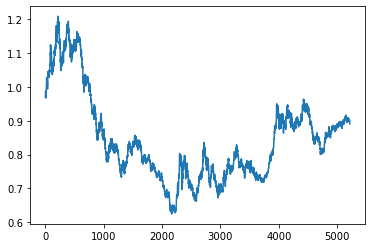

In [67]:
test_series.plot()

In [68]:
'''
lamb: float
The Hodrick-Prescott smoothing parameter. A value of 1600 is suggested for quarterly data. 
Ravn and Uhlig suggest using a value of 6.25 (1600/4**4) for annual data and 129600 (1600*3**4) for monthly data.
'''

noise, trend = sm.tsa.filters.hpfilter(test_series, lamb = 129600*30)

<AxesSubplot:>

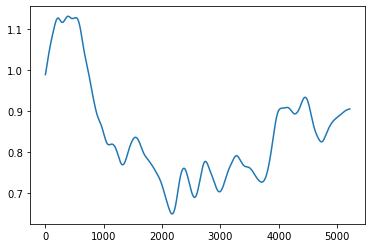

In [69]:
trend.plot()

In [70]:
test_df = pd.concat([test_series[:5217], trend, noise], axis = 1)

In [71]:
long = trend > test_series[:5217]

In [72]:
test_df.iloc[:, :2].plot(figsize = (20, 5))

<AxesSubplot:>

In [131]:
def buy(ts, lamb = 1600, window = 30):
    '''
    given a time-series of exchange data up to now, return current difference of low-frequency component and real timeseries
    if difference is positive, then buy; otherwise, sell. 
    '''
    noise, trend = sm.tsa.filters.hpfilter(ts[-window:], lamb = lamb)
    return  trend.iloc[-1] - test_series.iloc[-1]

In [132]:
buy(test_series[:1000])

-0.037472187489814734

In [133]:
test_series.iloc[950:1050].plot()
plt.plot(1000, test_series.iloc[1000], 'r+')

# Kernel Regression

In [117]:
import  statsmodels.nonparametric as sn
from datetime import datetime
import time

In [118]:
def str2date(string):

    element = datetime.strptime(string,"%Y-%m-%d") 
    tuple = element.timetuple() 
    timestamp = time.mktime(tuple)
    return timestamp

In [119]:
str2date('2000-01-03')

946879200.0

In [120]:
test = df['EURO AREA - EURO/US$'].values
now = datetime.now()
time = df['Time Serie'].apply(str2date).values
time = (time - time.mean())/time.std()

In [123]:
sn.kernel_regression.KernelReg(test[:100], time[:100], var_type = 'c')

KernelReg instance
Number of variables: k_vars = 1
Number of samples:   N = 100
Variable types:      c
BW selection method: cv_ls
Estimator type: ll